In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from datasets import load_dataset, Dataset, load_from_disk

I shall use 'DFKI-SLT/few-nerd' supervied dataset for training.

In [5]:
all_data = load_dataset("DFKI-SLT/few-nerd", "supervised")

Generating train split: 0 examples [00:00, ? examples/s]

  0%|          | 0/3359329 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

  0%|          | 0/482037 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

  0%|          | 0/958765 [00:00<?, ?it/s]

As we see, the dataset is already divided into train, validation, and test parts.

In [6]:
df_train = all_data["train"]
df_val = all_data["validation"]
df_test = all_data["test"]

# Train Set

In [7]:
df_train

Dataset({
    features: ['id', 'tokens', 'ner_tags', 'fine_ner_tags'],
    num_rows: 131767
})

In [8]:
# Access the first row of df_train
first_row = df_train[0]

# Print the first row
print(first_row)

{'id': '0', 'tokens': ['Paul', 'International', 'airport', '.'], 'ner_tags': [0, 0, 0, 0], 'fine_ner_tags': [0, 0, 0, 0]}


There are two types of tags in the dataset: 'ner_tags' and 'fine_ner_tags'. The dataset may be used for many different purposes, but we are interested in recognizing mountain names. Amongst 'fine_ner_tags', on position 25 (24 counting from 0), we have a tag 'location-mountain', which is exactly what interests us.

In [9]:
df_train.features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'art', 'building', 'event', 'location', 'organization', 'other', 'person', 'product'], id=None), length=-1, id=None),
 'fine_ner_tags': Sequence(feature=ClassLabel(names=['O', 'art-broadcastprogram', 'art-film', 'art-music', 'art-other', 'art-painting', 'art-writtenart', 'building-airport', 'building-hospital', 'building-hotel', 'building-library', 'building-other', 'building-restaurant', 'building-sportsfacility', 'building-theater', 'event-attack/battle/war/militaryconflict', 'event-disaster', 'event-election', 'event-other', 'event-protest', 'event-sportsevent', 'location-GPE', 'location-bodiesofwater', 'location-island', 'location-mountain', 'location-other', 'location-park', 'location-road/railway/highway/transit', 'organization-company', 'organization-education', 'organization-government/governmentagency', 'or

In [17]:
# Specify the label for mountain names
mountain_label = 24

Next I define a utility function that would count the rows containing mountain names, as well as the total number of different mountain names appearing in the set. This function shall then be used for every set I have.

In [18]:
def cnt_mount_names(df):
    # Count the sentences containing mountain names
    mountain_count = 0
    
    # Set to store unique mountain names
    mountain_names_set = set()
    
    # Iterate through the dataset
    for example in df:
        fine_ner_tags = example["fine_ner_tags"]
        tokens = example["tokens"]
    
        # Check if the label for mountain names (24) is present in the fine_ner_tags
        if mountain_label in fine_ner_tags:
            mountain_count += 1
    
            # Get the words corresponding to the mountain names
            mountain_words = [tokens[i] for i, label in enumerate(fine_ner_tags) if label == mountain_label]
    
            # Add unique mountain names to the set
            mountain_names_set.update(mountain_words)
    
    # Convert the set to a list
    mountain_names = list(mountain_names_set)

    return mountain_count, mountain_names

In [19]:
mountain_count, mountain_names = cnt_mount_names(df_train)

# Print the results
print("Number of sentences with mountain names in train set:", mountain_count)
print("Mountain names:", mountain_names)

Number of sentences with mountain names in train set: 1502
Mountain names: ['Dury', 'Messines', 'Uplift', 'Guerard', 'Barth', 'Limmat', 'Kliment', 'Jasielsko-Sanockie', 'Eagle', 'Lliwedd', 'Lawrence', 'Pigne', 'Horaiji', 'Löffler', 'Roots', 'Creigiau', 'Mill', 'Truckee', 'Oiti', 'Dolores', 'Tryfan', 'Dromedary', 'Reintal', 'Scott', 'Lazy', 'Weybridge', 'Riverside', 'Arsenal', 'Cho', 'Crystal', 'Wapack', 'Verila', 'Dru', 'Purcell', 'Cure', 'Erciyes', 'Ugain', 'Little', 'May', 'Oak', 'Priest', 'HMA', 'Tom', 'Moffat', 'Kaesong', 'Noe', 'Bartle', 'Minyong', 'Stybarrow', 'Wilder', 'Muerto', 'Blueberry', 'Cilau', 'Pass', 'Rhodopes', 'Flint', 'Sierra', 'Esgeiriau', 'Vénéon', 'Olympos', 'Springs', 'Crater', 'ridgelin', 'Palliser', 'Salvesen', 'Mesa', 'Bahadurpur', 'Catharine', 'Cleve', 'Gangelsberg', 'Drws', 'Piece', 'Zillertal', 'Crest', 'Himalayan', 'Mühlwald', 'Motte', 'Brunner', 'la', 'Mühlwalder', 'Dawson', 'Erebus', 'Unicoi', 'Absaroka', 'Kgale', 'Dreiecketer', 'Allegheny', 'Hicks', 'Arm

In [20]:
len(mountain_names)

1871

# Validation Set

In [12]:
df_val

Dataset({
    features: ['id', 'tokens', 'ner_tags', 'fine_ner_tags'],
    num_rows: 18824
})

In [13]:
# Access the first row of df_train
first_row = df_val[0]

# Print the first row
print(first_row)

{'id': '0', 'tokens': ['The', 'final', 'stage', 'in', 'the', 'development', 'of', 'the', 'Skyfox', 'was', 'the', 'production', 'of', 'a', 'model', 'with', 'tricycle', 'landing', 'gear', 'to', 'better', 'cater', 'for', 'the', 'pilot', 'training', 'market', '.'], 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'fine_ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 58, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


The features in validation set are exactly the same as they are in train (and, as we shall see, in test) set.

In [14]:
df_val.features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'art', 'building', 'event', 'location', 'organization', 'other', 'person', 'product'], id=None), length=-1, id=None),
 'fine_ner_tags': Sequence(feature=ClassLabel(names=['O', 'art-broadcastprogram', 'art-film', 'art-music', 'art-other', 'art-painting', 'art-writtenart', 'building-airport', 'building-hospital', 'building-hotel', 'building-library', 'building-other', 'building-restaurant', 'building-sportsfacility', 'building-theater', 'event-attack/battle/war/militaryconflict', 'event-disaster', 'event-election', 'event-other', 'event-protest', 'event-sportsevent', 'location-GPE', 'location-bodiesofwater', 'location-island', 'location-mountain', 'location-other', 'location-park', 'location-road/railway/highway/transit', 'organization-company', 'organization-education', 'organization-government/governmentagency', 'or

In [21]:
mountain_count, mountain_names = cnt_mount_names(df_val)

# Print the results
print("Number of sentences with mountain names in train set:", mountain_count)
print("Mountain names:", mountain_names)

Number of sentences with mountain names in train set: 218
Mountain names: ['Broad', 'Messines', 'Salient', 'Piestewa', 'Peak', 'Union', 'Smrk', 'Amagi', 'Uinta', 'Lofoten', 'Carpathian', 'Ilias', 'Volcano', 'Kladsko', 'na', 'Trout', 'Weybridge', 'Fells', 'oundary', 'Vermont', 'Madre', 'Little', 'Gasherbrum', 'Ślęża', ',', 'Rychlebské', 'Robson', 'Barre', 'Palo', 'Katla', 'Kawaikini', 'Jetisý', 'Narrows', 'Ozark', 'Eüüngaryn', 'Carmel', 'Ulriken', 'AVA', 'Rhodopes', 'Pass', 'Terrance', 'Notch', 'East', 'Sierra', 'Springs', 'Patagonia', "'s", 'Marsh', 'Fuego', 'Cordillera', 'Lingmell', 'Royal', 'Samgaksan', 'Esk', 'Skelton', 'Sete', 'Lers', 'Bilk', 'Pleasant', 'B.', 'Sowa', 'Klamath', 'Erebus', 'Sugarloaf', 'Horse', 'Aravalli', 'des', 'Allegheny', 'Uncompahgre', 'Constance', 'Moncenisio', 'Calderón', 'Western', 'range', 'Hughes', 'Água', 'Türkmenbaşy', 'Wild', 'Králický', 'Tatras', 'Owl', 'Tremblant', 'Sneffels', 'Drury', 'Brocken', 'Sal', 'Žiar', 'Richardson', 'Tai', 'Teton', 'Herne', '

In [22]:
len(mountain_names)

474

# Test Set

In [ ]:
df_test

Dataset({
    features: ['id', 'tokens', 'ner_tags', 'fine_ner_tags'],
    num_rows: 37648
})

In [ ]:
# Access the first row of df_train
first_row = df_test[0]

# Print the first row
print(first_row)

{'id': '0', 'tokens': ['In', 'the', 'early', '1930s', 'the', 'band', 'moved', 'to', 'the', 'Grill', 'Room', 'of', 'the', 'Taft', 'Hotel', 'in', 'New', 'York', ';', 'the', 'band', 'was', 'renamed', '``', 'George', 'Hall', 'and', 'His', 'Hotel', 'Taft', 'Orchestra', '``', '.'], 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 4, 4, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0], 'fine_ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 0, 0, 9, 9, 0, 21, 21, 0, 0, 0, 0, 0, 0, 35, 35, 35, 35, 35, 35, 35, 0, 0]}


In [ ]:
df_test.features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'art', 'building', 'event', 'location', 'organization', 'other', 'person', 'product'], id=None), length=-1, id=None),
 'fine_ner_tags': Sequence(feature=ClassLabel(names=['O', 'art-broadcastprogram', 'art-film', 'art-music', 'art-other', 'art-painting', 'art-writtenart', 'building-airport', 'building-hospital', 'building-hotel', 'building-library', 'building-other', 'building-restaurant', 'building-sportsfacility', 'building-theater', 'event-attack/battle/war/militaryconflict', 'event-disaster', 'event-election', 'event-other', 'event-protest', 'event-sportsevent', 'location-GPE', 'location-bodiesofwater', 'location-island', 'location-mountain', 'location-other', 'location-park', 'location-road/railway/highway/transit', 'organization-company', 'organization-education', 'organization-government/governmentagency', 'or

In [23]:
mountain_count, mountain_names = cnt_mount_names(df_test)

# Print the results
print("Number of sentences with mountain names in train set:", mountain_count)
print("Mountain names:", mountain_names)

Number of sentences with mountain names in train set: 448
Mountain names: ['Tengri', 'Broad', 'Nevado', 'Imperial', 'Bursey', 'Chateaux', 'Surtningsuen', 'El', 'Peak', 'Mather', 'Köýtendag', 'Huggins', 'Kliment', 'Pennsylvania', 'Eagle', 'Alborz', 'Galunggung', 'Fatra', 'Appenzell', 'Lēahi', 'Dolomites', 'Rhinogydd', 'Massilia', 'Ben', 'Francis', 'Wilderness', 'Methodius', 'Barbara', 'Mill', 'Carpathian', 'Vancouver', 'Volcano', 'Round', 'Top', 'Dominguez', 'Kriváň', 'Carroll', 'Colfax', 'Tryfan', 'Kirkpatrick', 'Dromedary', 'White', 'Scott', 'Wind', 'Fells', 'Downs', 'Kangaroo', 'Vermont', 'f', 'Skiddaw', 'Purcell', 'Düssi', 'Ejersa', 'Karakoram', 'Madre', 'Little', 'Capitan', 'Gasherbrum', 'Malika', ',', 'Ötztal', 'im', 'also', 'Prospect', 'Apo', 'Noe', 'Antelope', 'Sahyadri', 'E8', 'Chiurwi', 'Auster', 'Kawaikini', 'Wattental', 'Jetisý', 'Grappa', 'Sturm', 'Summer', 'Tennessee', 'Scerscen', 'Eüüngaryn', 'Carmel', 'Pointe', 'Hia', 'Pass', 'Conservation', 'Rhodopes', 'Flint', 'Sierra'

In [24]:
len(mountain_names)

776

# Extracting Important data

The next step is to extraxct the important data. As we have seen above, the number of rows with mountain names is much less than the total number of rows in each of the sets. Thus we take only the singificant rows, as well as some small number of others (to have sentences with no mountains).

In [25]:
def balance_data(df, mountain_rows_count, additional_rows_count):

  # Extract rows with mountain names
  mountain_rows = [example for example in df if mountain_label in example["fine_ner_tags"]]

  # Extract rows without mountain names
  non_mountain_rows = [example for example in df if mountain_label not in example["fine_ner_tags"]]

  # Randomly select additional rows without mountain names
  random.seed(42)
  additional_rows = random.sample(non_mountain_rows, additional_rows_count)

  # Combine rows with mountain names and additional rows
  balanced_data = mountain_rows + additional_rows

  # Shuffle the combined data
  random.shuffle(balanced_data)

  # Modify the 'fine_ner_tags' values
  for example in balanced_data:
      example["fine_ner_tags"] = [1 if label == mountain_label else 0 for label in example["fine_ner_tags"]]

  # Remove 'ner_tags' key and rename 'fine_ner_tags' to 'ner_tags'
  for example in balanced_data:
      del example['ner_tags']
      example['ner_tags'] = example.pop('fine_ner_tags')

  return Dataset.from_dict({key: [example[key] for example in balanced_data] for key in balanced_data[0]})

In [26]:
balanced_train_dataset = balance_data(df_train, 1502, 2000 - 1502)

# Print the size of the resulting balanced training set
print("Size of the balanced training set:", len(balanced_train_dataset))

Size of the balanced training set: 2000


In [27]:
balanced_train_dataset[0]

{'id': '125126',
 'tokens': ['The',
  'Salamander',
  'Glacier',
  'covered',
  'an',
  'area',
  'of',
  'approximately',
  'as',
  'of',
  '1993',
  '.'],
 'ner_tags': [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [28]:
balanced_val_dataset = balance_data(df_val, 218, 300 - 218)

# Print the size of the resulting balanced validation set
print("Size of the balanced validation set:", len(balanced_val_dataset))

Size of the balanced validation set: 300


In [29]:
balanced_val_dataset[1]

{'id': '9152',
 'tokens': ['Una',
  'lies',
  'in',
  'the',
  'south-western',
  'part',
  'of',
  'Himachal',
  'Pradesh',
  ',',
  'with',
  'the',
  'Sivalik',
  'Hills',
  'of',
  'the',
  'Himalayas',
  'rolling',
  'on',
  'one',
  'side',
  '.'],
 'ner_tags': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0]}

In [30]:
balanced_test_dataset = balance_data(df_test, 448, 550 - 448)

# Print the size of the resulting balanced test set
print("Size of the balanced test set:", len(balanced_test_dataset))

Size of the balanced test set: 550


In [31]:
balanced_test_dataset[0]

{'id': '10016',
 'tokens': ['Mrima',
  'Hill',
  'represents',
  'one',
  'of',
  'the',
  'largest',
  'niobium',
  'reserves',
  'in',
  'Kenya',
  ',',
  'having',
  'estimated',
  'reserves',
  'of',
  '105.3',
  'million',
  'tonnes',
  'of',
  'ore',
  'grading',
  '0.65',
  '%',
  'niobium',
  'metal',
  '.'],
 'ner_tags': [1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

# Statistics

Finally, we shall view some statistics, to get aquainted with the data.

In [33]:
# Function to calculate word counts
def calculate_word_counts(dataset):
    return [len(tokens) for tokens in dataset['tokens']]

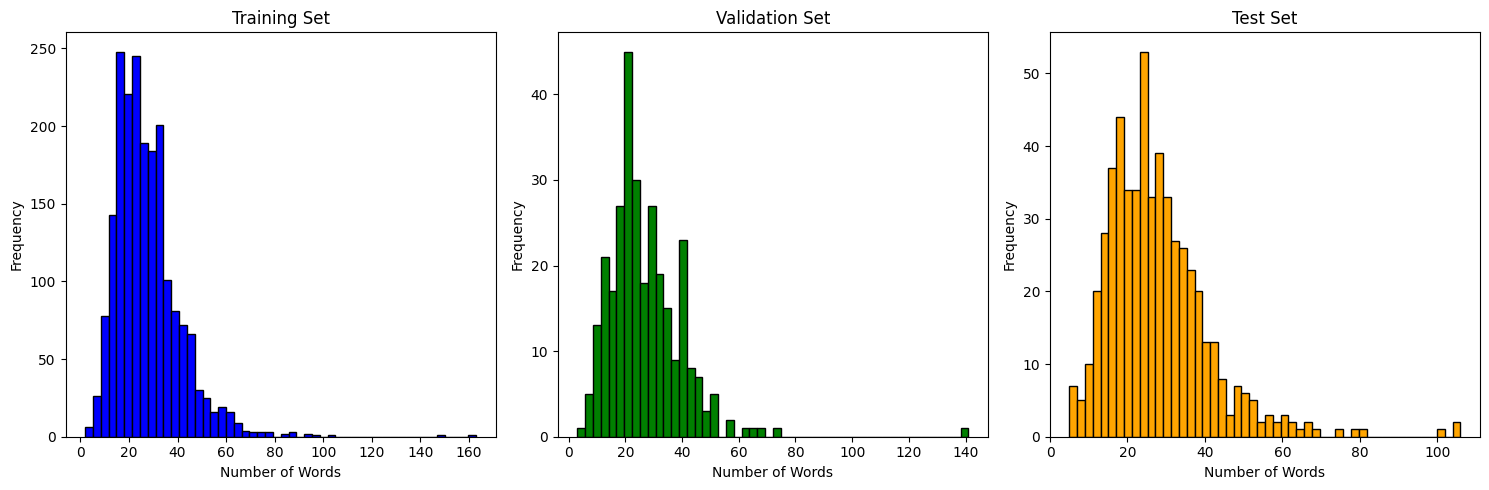

In [34]:
# Calculate word counts for each dataset
word_counts_train = calculate_word_counts(balanced_train_dataset)
word_counts_val = calculate_word_counts(balanced_val_dataset)
word_counts_test = calculate_word_counts(balanced_test_dataset)

# Plot the histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(word_counts_train, bins=50, color='blue', edgecolor='black')
plt.title('Training Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(word_counts_val, bins=50, color='green', edgecolor='black')
plt.title('Validation Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(word_counts_test, bins=50, color='orange', edgecolor='black')
plt.title('Test Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The distributions of word counts are similar across train, val, and test data.

In [35]:
def find_word_count_threshold(word_counts, percentage):
    # Sort the word counts
    sorted_word_counts = sorted(word_counts)

    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(sorted_word_counts) / np.sum(sorted_word_counts)

    # Find the index where the CDF reaches or exceeds the desired percentage
    threshold_index = np.argmax(cdf >= percentage)

    # Get the word count threshold
    word_count_threshold = sorted_word_counts[threshold_index]

    return word_count_threshold

In [36]:
# Calculate word count thresholds for each dataset
threshold_train = find_word_count_threshold(word_counts_train, 0.95)
threshold_val = find_word_count_threshold(word_counts_val, 0.95)
threshold_test = find_word_count_threshold(word_counts_test, 0.95)

# Print the results
print("Word count threshold covering 95% of rows in the training set:", threshold_train)
print("Word count threshold covering 95% of rows in the validation set:", threshold_val)
print("Word count threshold covering 95% of rows in the test set:", threshold_test)

Word count threshold covering 95% of rows in the training set: 63
Word count threshold covering 95% of rows in the validation set: 63
Word count threshold covering 95% of rows in the test set: 64


Almost all the sentences have no more than 63 words.

In [37]:
# Function to calculate mountain names counts
def calculate_mountain_names_count(dataset):
    return [sum(ner_tags) for ner_tags in dataset['ner_tags']]

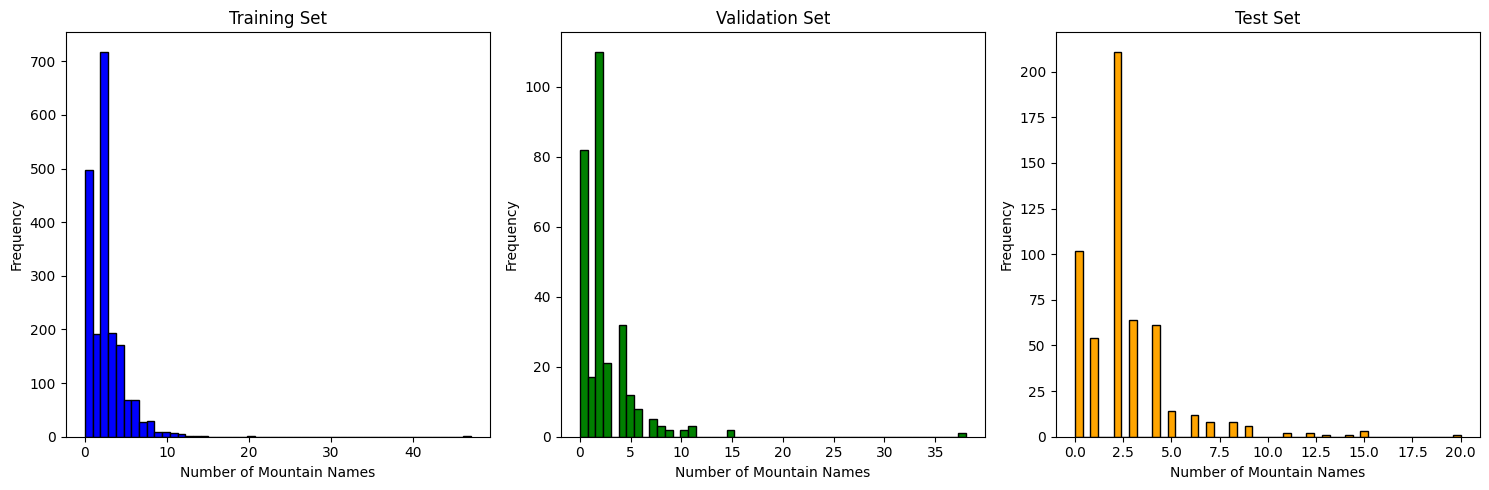

In [38]:
# Calculate mountain names counts for each dataset
mountain_names_count_train = calculate_mountain_names_count(balanced_train_dataset)
mountain_names_count_val = calculate_mountain_names_count(balanced_val_dataset)
mountain_names_count_test = calculate_mountain_names_count(balanced_test_dataset)

# Plot the histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mountain_names_count_train, bins=50, color='blue', edgecolor='black')
plt.title('Training Set')
plt.xlabel('Number of Mountain Names')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mountain_names_count_val, bins=50, color='green', edgecolor='black')
plt.title('Validation Set')
plt.xlabel('Number of Mountain Names')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(mountain_names_count_test, bins=50, color='orange', edgecolor='black')
plt.title('Test Set')
plt.xlabel('Number of Mountain Names')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()